In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def plot_fold_change_histogram_symmetric(y_true, y_pred,color):
    # 计算 fold change：预测值相对于真实值的倍数
    fold_change_pos = y_pred[y_pred >= y_true] / y_true[y_pred >= y_true]  # 预测值大于真实值
    fold_change_neg = y_true[y_pred < y_true] / y_pred[y_pred < y_true]    # 预测值小于真实值

    # 合并数据并生成单一的对数间隔
    fold_change_combined = np.concatenate((1/fold_change_neg, fold_change_pos))
    bins = np.logspace(-3, 3, 150)  # 增加分辨率，使用150个区间
    plt.figure(figsize=(10, 6),dpi=500)

    # 绘制直方图
    plt.hist(fold_change_combined, bins=bins,color=color, edgecolor='black', alpha=0.7, 
             label="Residual Error (Prediction vs Actual)", rwidth=0.9)  # rwidth 调整间隙

    # 添加对数刻度和中心的1
    plt.xscale('log')
    plt.xlabel("Prediction error (fold change)", fontsize=20,fontweight='bold')
    plt.ylabel("Count", fontsize=20,fontweight='bold')

    # 添加大于特定倍数误差的百分比标记
    thresholds = [10, 100, 1000]
    total_count_pos = len(fold_change_pos)
    total_count_neg = len(fold_change_neg)
    total_count_all = total_count_neg + total_count_pos
    
    for threshold in thresholds:
        # 计算右侧误差大于特定阈值的数量和百分比
        count_above_pos = np.sum(fold_change_pos > threshold)
        percentage_pos = (count_above_pos / total_count_all) * 100
        
        # 计算左侧误差大于特定阈值的数量和百分比
        count_above_neg = np.sum(fold_change_neg > threshold)
        percentage_neg = (count_above_neg / total_count_all) * 100
        
        # 在右侧标注阈值线和百分比
        plt.axvline(threshold, color='black', linestyle='--', linewidth=1)
        plt.text(threshold, plt.ylim()[1] * 0.8, f"{percentage_pos:.1f}%", color="black", ha="center", fontsize=15,fontweight='bold')

        # 在左侧标注阈值线和百分比
        plt.axvline(1/threshold, color='black', linestyle='--', linewidth=1)
        plt.text(1/threshold, plt.ylim()[1] * 0.8, f"{percentage_neg:.1f}%", color="black", ha="center", fontsize=15,fontweight='bold')

    # 设置 x 轴的对称 log 刻度
    plt.xticks([1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], ["1000", "100", "10", "1", "10", "100", "1000"])

    # 去除上边框和右边框
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)


    # 获取当前坐标轴对象
    ax = plt.gca()
        # 加粗 x 轴和 y 轴的刻度
    ax.tick_params(axis='both', labelsize=15, width=2)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')  # 加粗刻度标签

    plt.show()

#MT

In [3]:
color='#6E76B4'

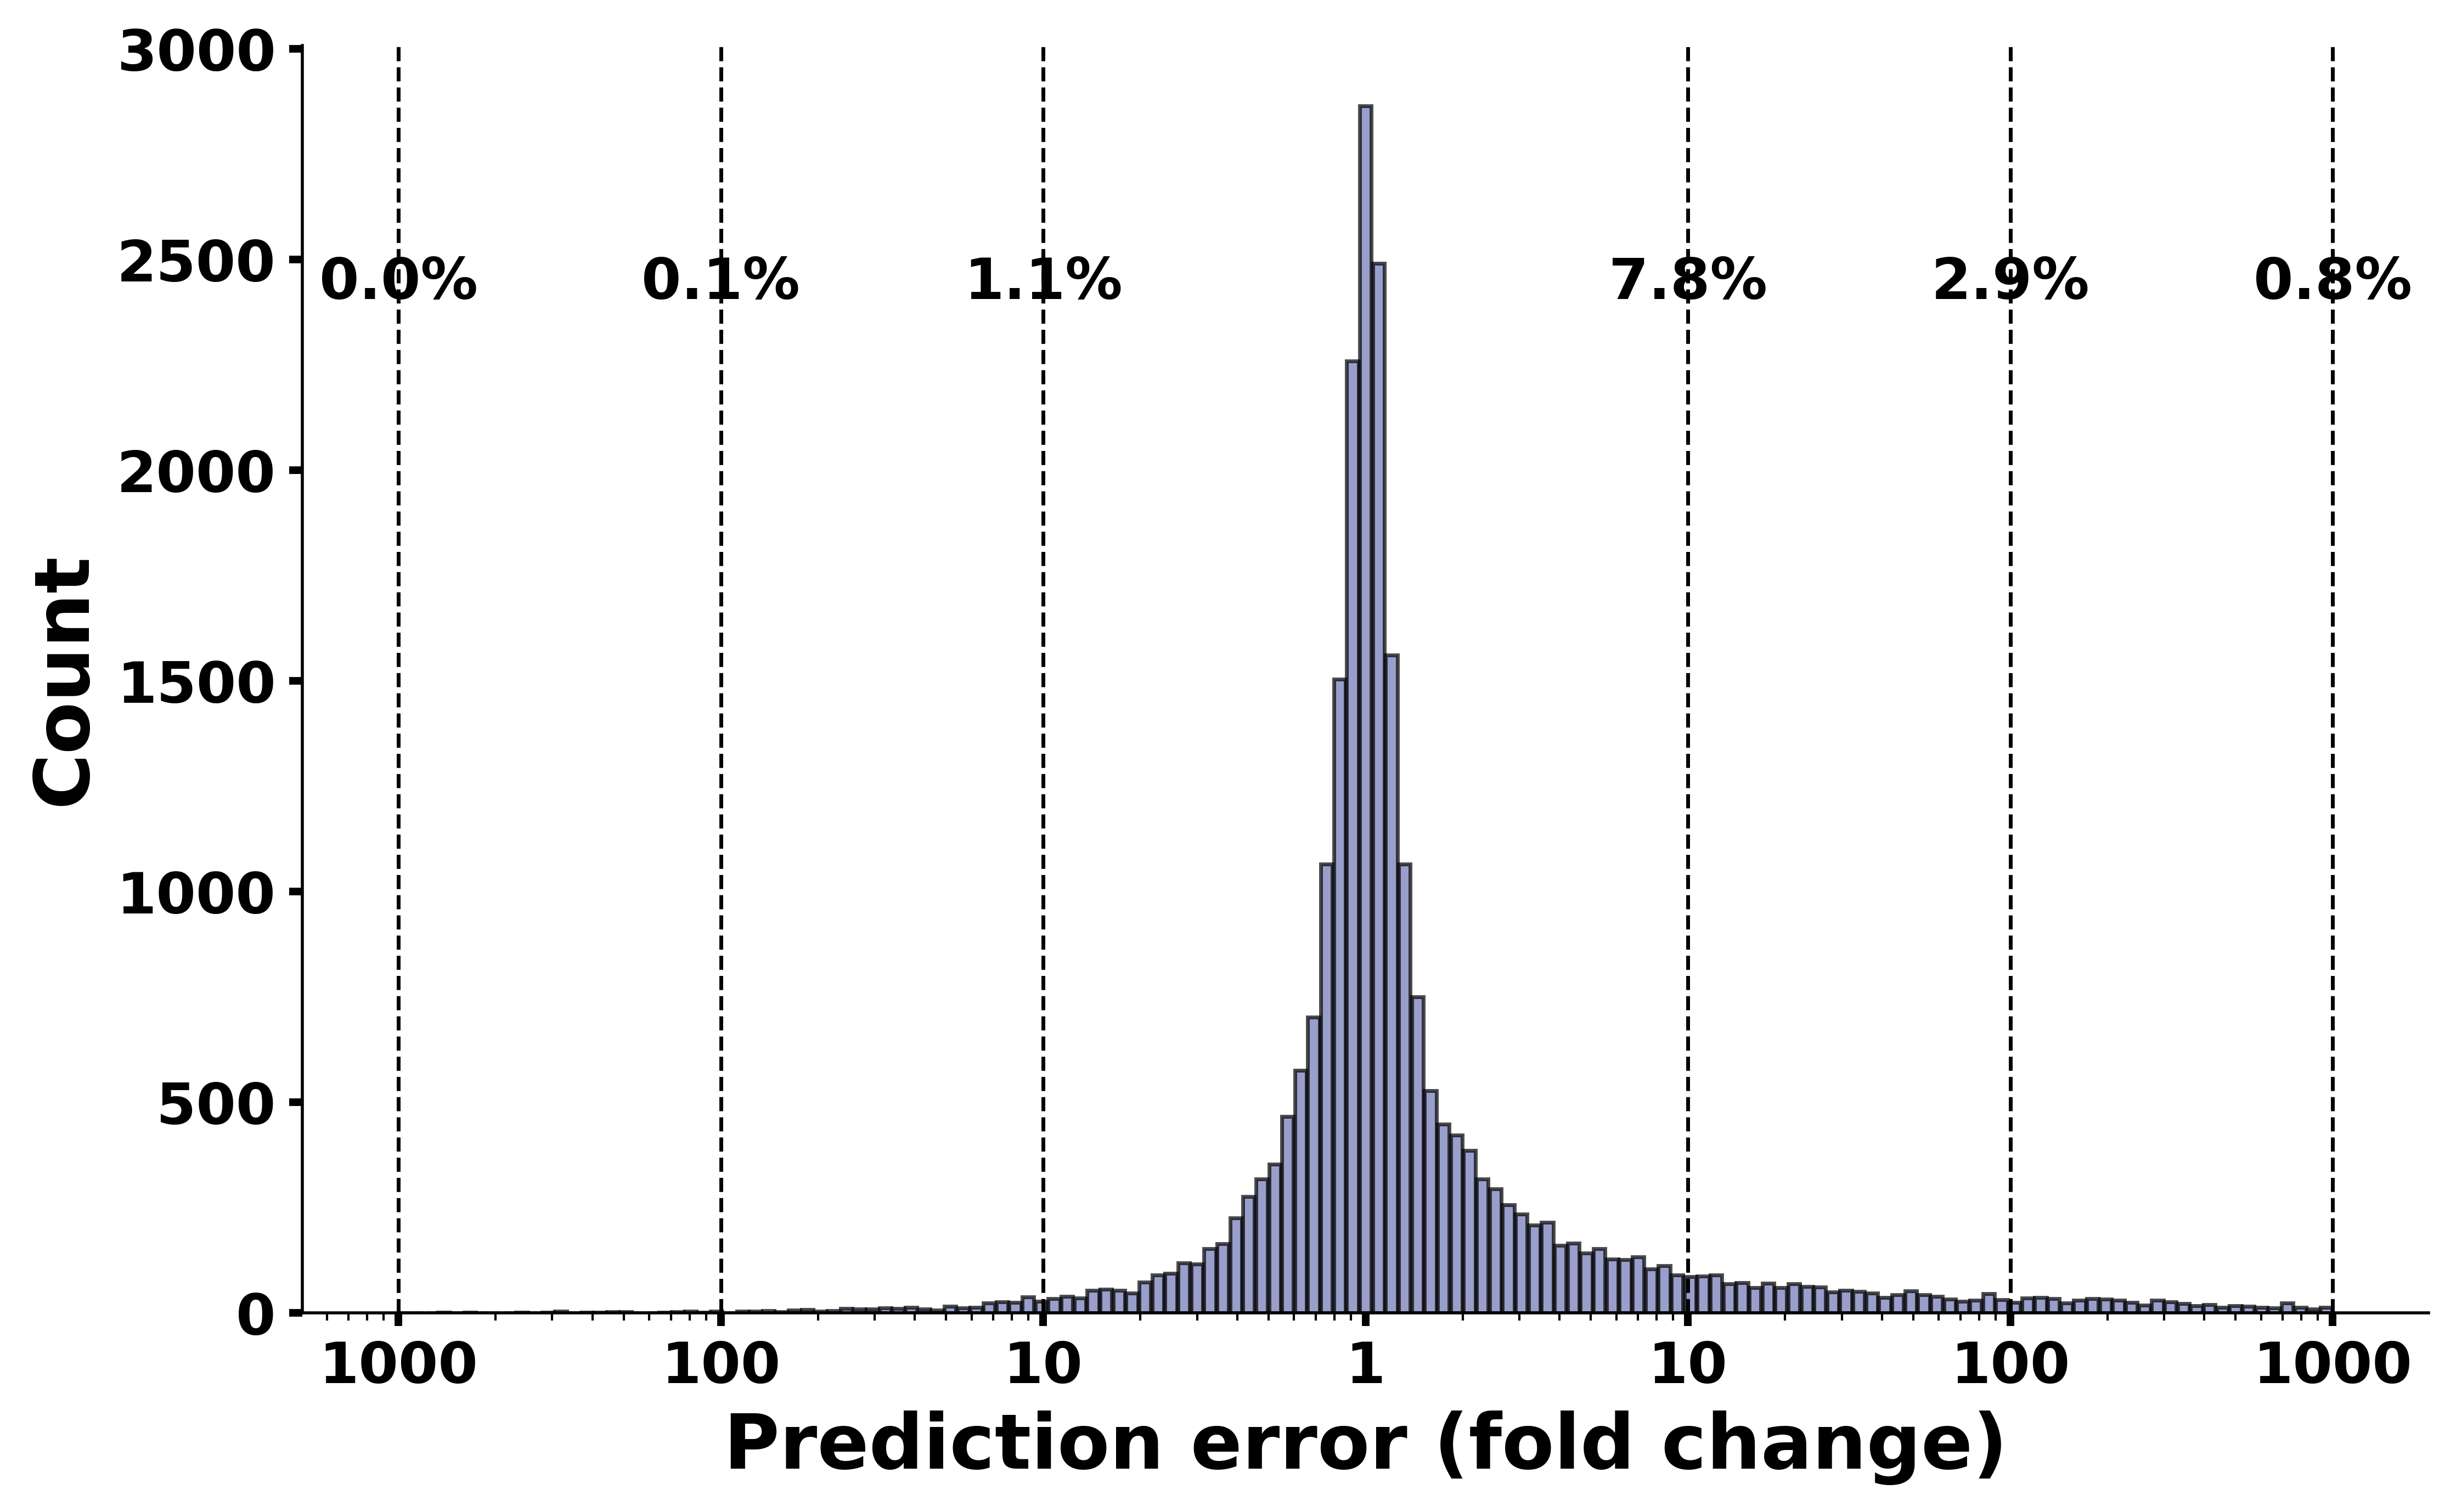

In [4]:
import pandas as pd

dnn_data = pd.read_csv('./MT_dnn_evaluation_results.csv')
all_y_true=dnn_data['y_true']
all_y_pred=dnn_data['y_pred']

plot_fold_change_histogram_symmetric(all_y_true, all_y_pred,color)

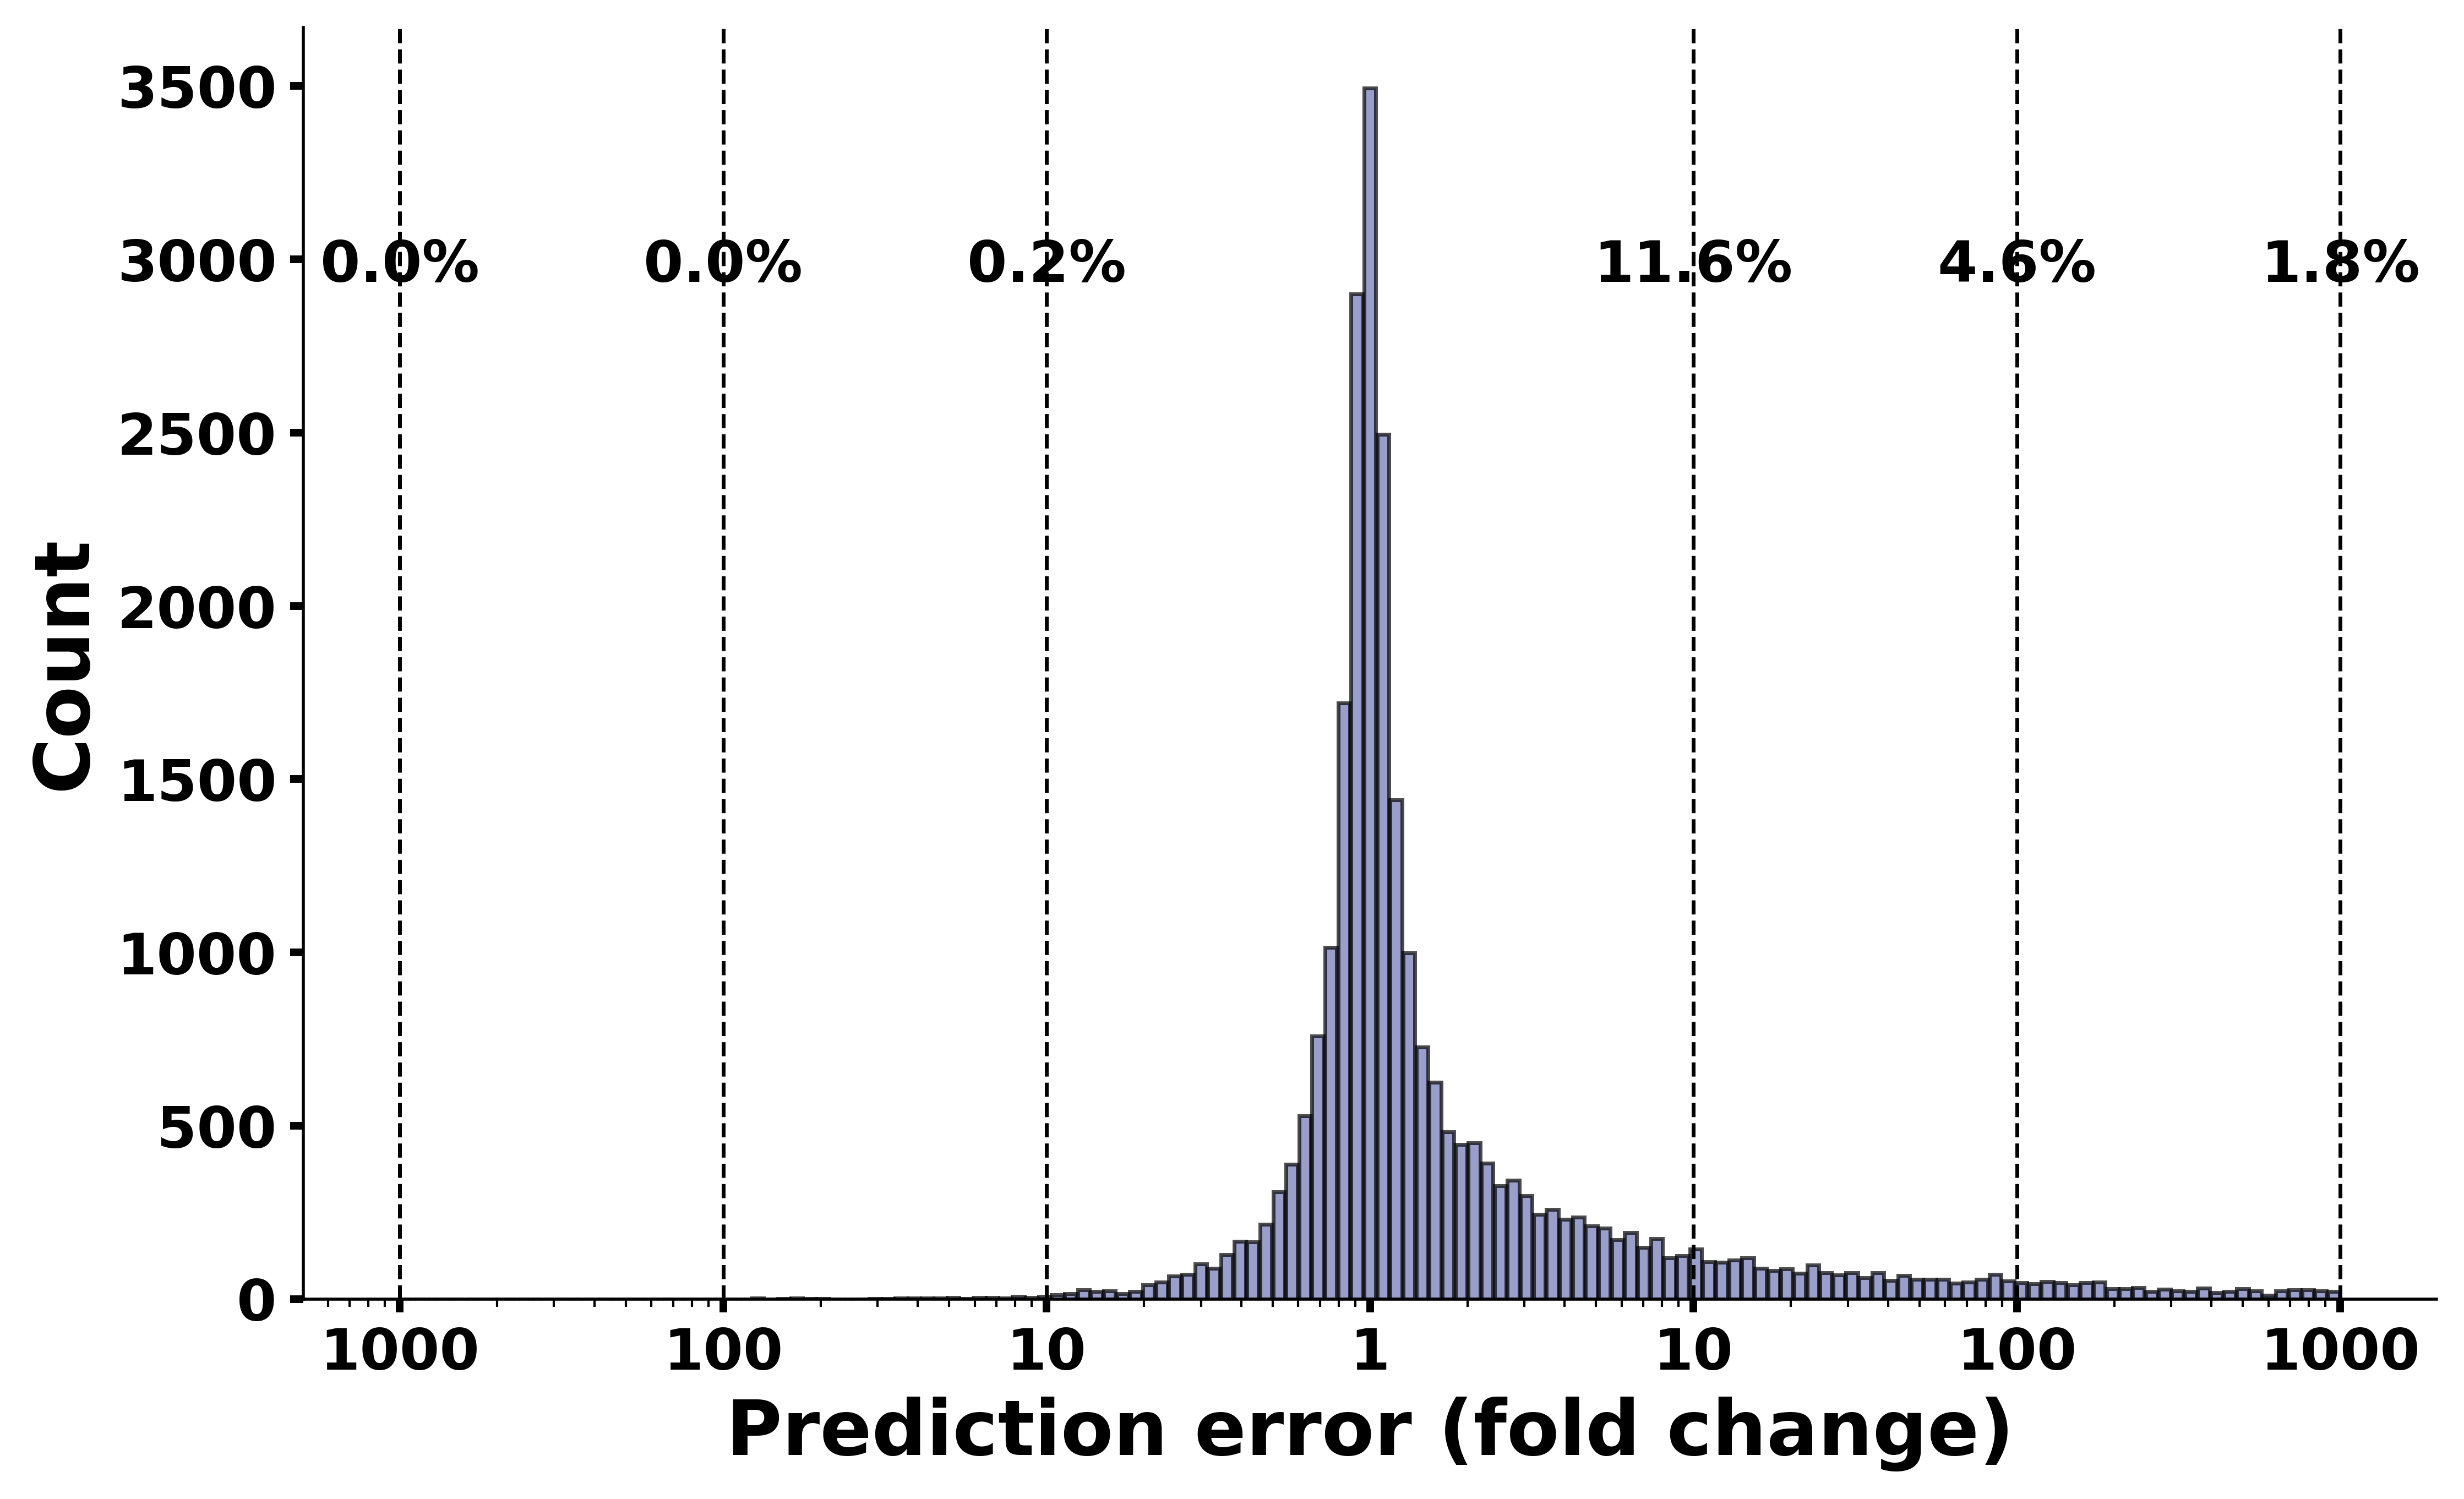

In [5]:
dnn_data = pd.read_csv('./MT_xgboost_evaluation_results.csv')
all_y_true=dnn_data['y_true']
all_y_pred=dnn_data['y_pred']

plot_fold_change_histogram_symmetric(all_y_true, all_y_pred,color)

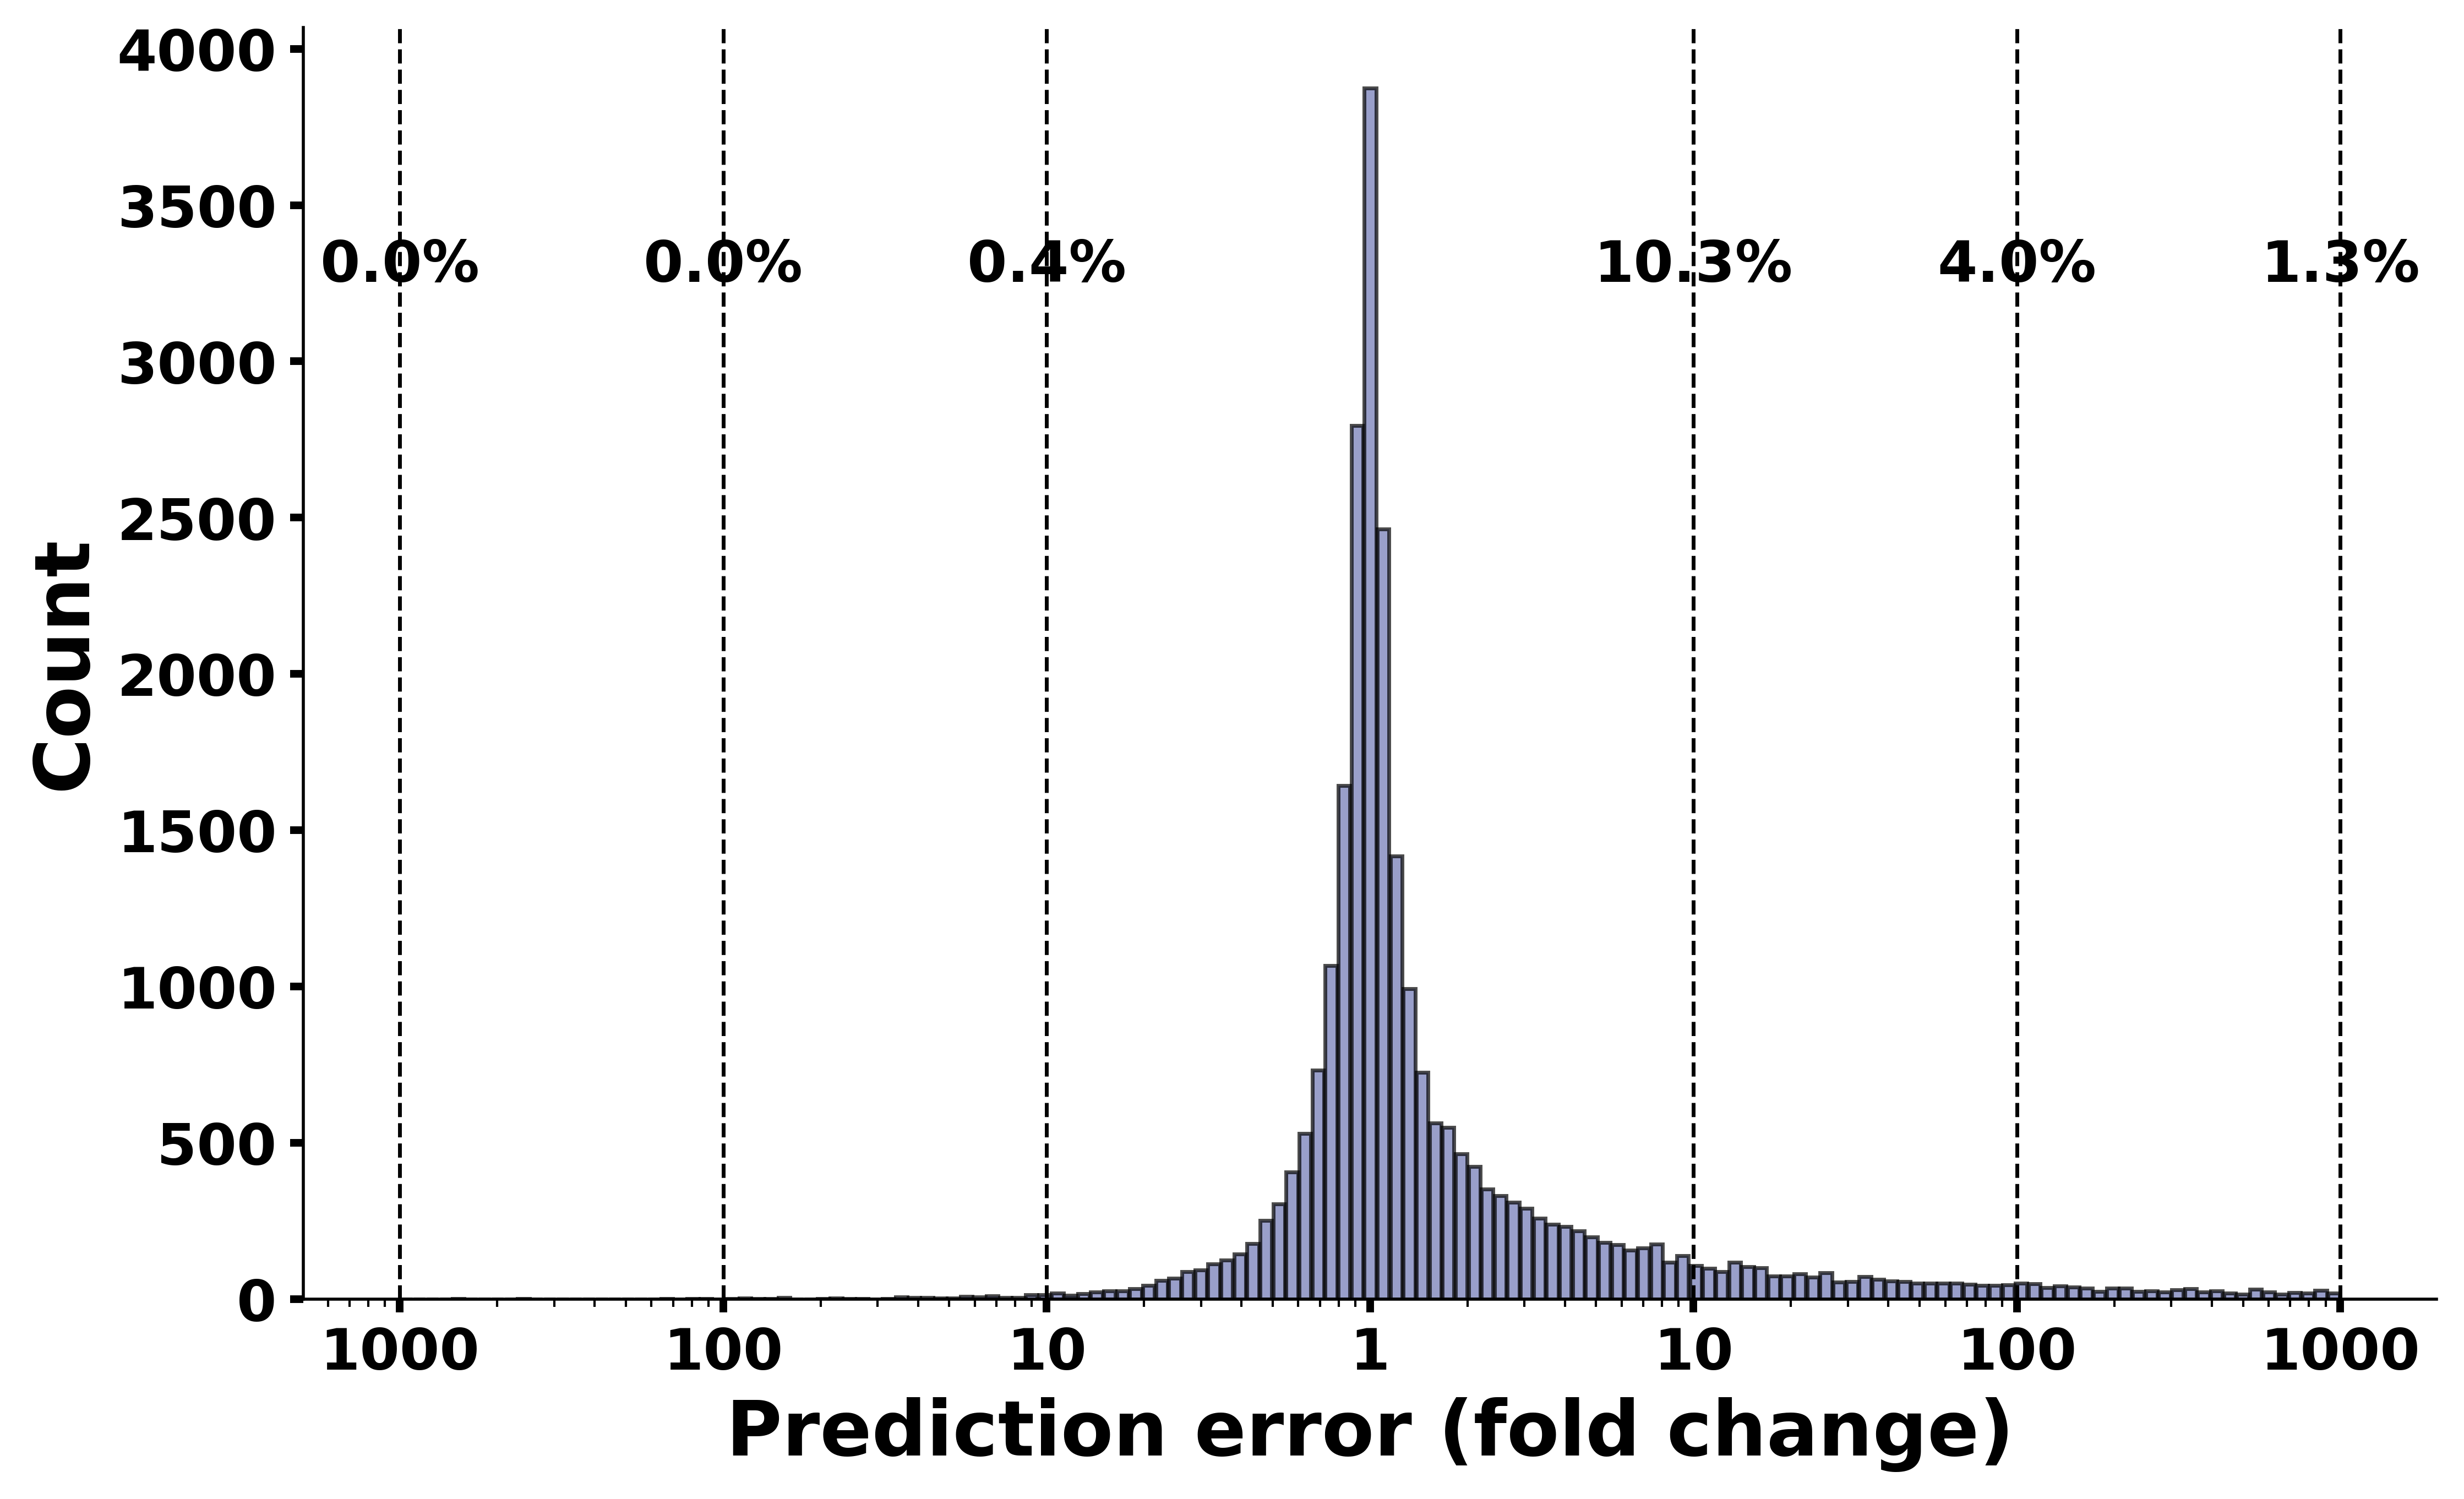

In [6]:
dnn_data = pd.read_csv('./MT_lightgbm_evaluation_results.csv')
all_y_true=dnn_data['y_true']
all_y_pred=dnn_data['y_pred']

plot_fold_change_histogram_symmetric(all_y_true, all_y_pred,color)

#CLS